# AI DAM EDA - This notebook cover dataset summary

1. original dataset summay
2. duplicate dataset sumamry
3. misclassified dataset summary
4. final dataset summary after adding noise


In [2]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import time
import os
#from tqdm import tqdm # for progress indication

In [3]:
# this is original image dataset for left hand driving
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
left_class_desc = ['safe driving', 'texting-right', 'talking on the phone-right', 'texting-left', 'talking on the phone-left', 
              'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
right_class_desc = ['safe driving', 'texting-left', 'talking on the phone-left', 'texting-right', 'talking on the phone-right', 
              'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
df_desc = pd.DataFrame({'class': class_list, 'left_desc': left_class_desc,  'right_desc': right_class_desc})
df_desc

,class,left_desc,right_desc
0,c0,safe driving,safe driving
1,c1,texting-right,texting-left
2,c2,talking on the phone-right,talking on the phone-left
3,c3,texting-left,texting-right
4,c4,talking on the phone-left,talking on the phone-right
5,c5,operating the radio,operating the radio
6,c6,drinking,drinking
7,c7,reaching behind,reaching behind
8,c8,hair and makeup,hair and makeup
9,c9,talking to passenger,talking to passenger


In [9]:
df_data = pd.read_csv("dam_dataset_final.csv")
df_data.head(2)

,SNo,subject,classname,img,duplicate,parent_img,ssim_score,duplicate_final
0,0,p002,c0,img_44733.jpg,0,NaN,0.000000,0
1,1,p002,c0,img_72999.jpg,1,img_44733.jpg,0.856947,1


### Original Dataset Analysis

In [10]:
print("Original dataset size: ", df_data.shape[0])

Original dataset size:  22424


In [19]:
# original dataset: count: how the classes are distributed
df_data["classname"].value_counts()

c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64

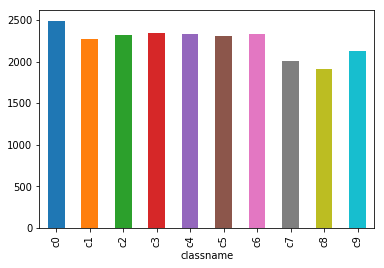

In [20]:
# original dataset: visualization: how the classes are distributed
df_data.groupby(df_data["classname"]).count()["img"].plot(kind="bar")

In [21]:
# original dataset:: count:  how the drivers are distributed across dataset
df_data["subject"].value_counts()

p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p012     823
p081     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64

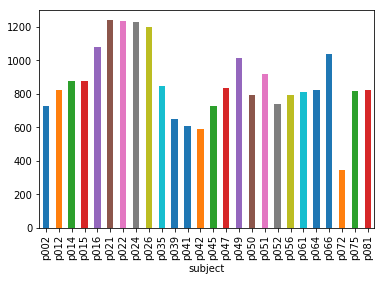

In [22]:
# original dataset:: visualization: plotting how the drivers are distributed across dataset
df_data.groupby(df_data["subject"]).count()["img"].plot(kind="bar")

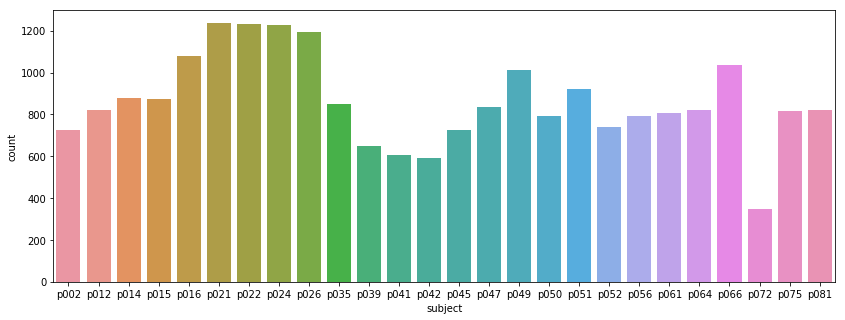

In [23]:
# original dataset:plotting how the drivers are distributed across dataset (same as above but with different plot size)
fig, axs = plt.subplots(1,1,figsize=(14,5))
sns.countplot(df_data["subject"], ax = axs)

In [24]:
driver_list = df_data["subject"].unique()
class_id_list = df_data["classname"].unique()
print("Number of unique drivers: ", len(driver_list))
print("Number of class: ", len(class_id_list))

Number of unique drivers:  26
Number of class:  10


In [25]:
## CrossTable: drivers and class distibution
df_ct_class_driver = pd.crosstab(df_data["classname"], df_data["subject"],margins =True).T
df_ct_class_driver

classname,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,All
subject,,,,,,,,,,,
p002,76,74,86,79,84,76,83,72,44,51,725
p012,84,95,91,89,97,96,75,72,62,62,823
p014,100,103,100,100,103,102,101,77,38,52,876
p015,79,85,88,94,101,101,99,81,86,61,875
p016,111,102,101,128,104,104,108,101,99,120,1078
p021,135,131,127,128,132,130,126,98,99,131,1237
p022,129,129,128,129,130,130,131,98,98,131,1233
p024,130,129,128,130,129,131,129,101,99,120,1226
p026,130,129,130,131,126,130,128,97,97,98,1196


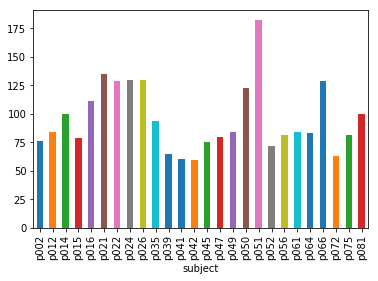

In [27]:
# visualize how drivers are distirbuted witin a class
classname = "c0"  # change the class name
df_ct_class_driver[classname][:-1].plot(kind="bar")

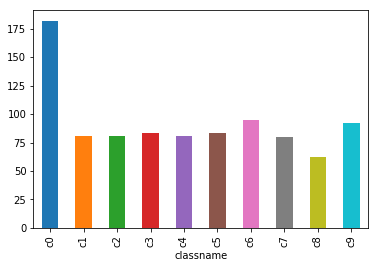

In [28]:
# visualize how particular driver is distirbuted across classes
driverid = "p051"
df_ct_class_driver.T[driverid][:-1].plot(kind="bar")

In [29]:
# get number of unique driver representing each classes
for c in class_id_list:
    cnt = df_data[df_data["classname"] == c]["subject"].unique().shape[0] 
    print("Number of unique drivers in class {}: {}".format(c, cnt))

Number of unique drivers in class c0: 26
Number of unique drivers in class c1: 26
Number of unique drivers in class c2: 26
Number of unique drivers in class c3: 26
Number of unique drivers in class c4: 26
Number of unique drivers in class c5: 26
Number of unique drivers in class c6: 26
Number of unique drivers in class c7: 26
Number of unique drivers in class c8: 26
Number of unique drivers in class c9: 26


In [30]:
# get minimum and maxmimum of driver's samples in class across dataset
CNT_PER_DRIVER_LIST = []
for c in class_id_list:
    for d in driver_list:
        cnt = df_data[(df_data["classname"] == c) & (df_data["subject"] == d)].shape[0]     
        CNT_PER_DRIVER_LIST.append(cnt)
        
MAX_NUM_IMGS_PER_DRIVER = np.max(CNT_PER_DRIVER_LIST)
MIN_NUM_IMGS_PER_DRIVER = np.min(CNT_PER_DRIVER_LIST)
print("MIN_NUM_IMGS_PER_DRIVER: ", MIN_NUM_IMGS_PER_DRIVER)
print("MAX_NUM_IMGS_PER_DRIVER: ", MAX_NUM_IMGS_PER_DRIVER)

MIN_NUM_IMGS_PER_DRIVER:  2
MAX_NUM_IMGS_PER_DRIVER:  182


In [31]:
# minimum representation of any driver in class
np.min(df_ct_class_driver[:-1])

classname
c0      59
c1      45
c2      36
c3      31
c4      34
c5       6
c6      35
c7       2
c8      21
c9      51
All    346
dtype: int64

In [32]:
# maximum representation of any driver in class
np.max(df_ct_class_driver[:-1])

classname
c0      182
c1      131
c2      130
c3      131
c4      132
c5      131
c6      131
c7      101
c8      114
c9      131
All    1237
dtype: int64

### Duplicate Data summary

Note: duplicate_final: attribute indicating whether image is duplicate or not
value: 1 => duplicate and this image shall be removed from dataset
       0 => not a duplicate and its part of model building

In [45]:
df_data["duplicate_final"].value_counts()

0    15855
1     6569
Name: duplicate_final, dtype: int64

In [46]:
## CrossTable: drivers and class distibution
df_ct_class_dup = pd.crosstab(df_data["classname"], df_data["duplicate_final"],margins =True).T
df_ct_class_dup

classname,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,All
duplicate_final,,,,,,,,,,,
0,1550,1567,1584,1585,1640,1643,1562,1635,1563,1526,15855
1,939,700,733,761,686,669,763,367,348,603,6569
All,2489,2267,2317,2346,2326,2312,2325,2002,1911,2129,22424


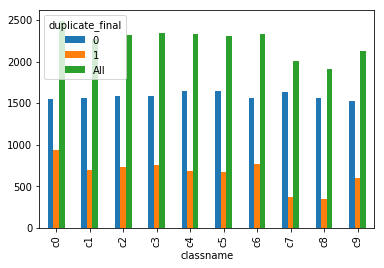

In [47]:
#plotting how the duplicate images based on ssim score exsit among each classes
df_ct_class_dup.T[:-1].plot(kind="bar")

In [56]:
# filter duplicate data and get unnique dataset
df_data_duplicate = df_data[df_data["duplicate_final"] == 1]

In [57]:
df_data_duplicate["classname"].value_counts()

c0    939
c6    763
c3    761
c2    733
c1    700
c4    686
c5    669
c9    603
c7    367
c8    348
Name: classname, dtype: int64

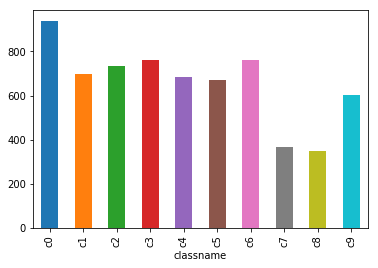

In [59]:
# visualization: how duplicate data are distributed across classes
df_data_duplicate.groupby(df_data_duplicate["classname"]).count()["img"].plot(kind="bar")

### Misclassified data

In [77]:
# initialized count
origina_cnt = [2489, 2267, 2317, 2346, 2326, 2312, 2325, 2002, 1911, 2129]
duplicate_cnt = [939, 700, 733, 761, 686, 669, 763, 367, 348, 603]
misclassified_cnt = [78, 39, 57, 29, 53, 36, 33, 18, 74, 416]

In [78]:
df_count = pd.DataFrame({'class': class_list, 
                         'original': origina_cnt, 
                         'duplicate': duplicate_cnt, 
                         "misclassified": misclassified_cnt
                        })
df_count["remaining"] = df_count["original"] - df_count["duplicate"] - df_count["misclassified"]
df_count

,class,original,duplicate,misclassified,remaining
0,c0,2489,939,78,1472
1,c1,2267,700,39,1528
2,c2,2317,733,57,1527
3,c3,2346,761,29,1556
4,c4,2326,686,53,1587
5,c5,2312,669,36,1607
6,c6,2325,763,33,1529
7,c7,2002,367,18,1617
8,c8,1911,348,74,1489
9,c9,2129,603,416,1110


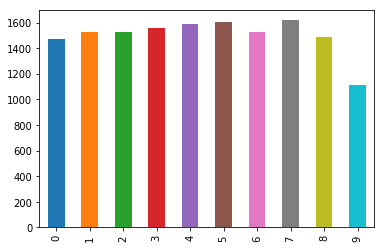

In [79]:
# visualization: final class distribution after removing duplicates and misclassified images
df_count["remaining"].plot(kind="bar")

### adding noise to dataset

Following noise is added to the remaining dataset.
1. gausian blur(radius=2)
2. sharpness(val=10)
3. edge_enhance
4. crop border(val=0.20)
5. shift UP(val=0.1)
6. brightness(5)
7. brightness(0.3)


1. For each class around total of 17 percentage noise is added.. 
2. Upsampling is done for class9 to balance the data distribution

In [88]:
# data distributaion post noise addition
final_dataset_cnt = [1724, 1794, 1793, 1822, 1860, 1887, 1795, 1897, 1748, 1726]

In [86]:
df_dataset_final = pd.DataFrame({'class': class_list, 
                         'final': final_dataset_cnt                        })
df_dataset_final

,class,final
0,c0,1724
1,c1,1794
2,c2,1793
3,c3,1822
4,c4,1860
5,c5,1887
6,c6,1795
7,c7,1897
8,c8,1748
9,c9,1726


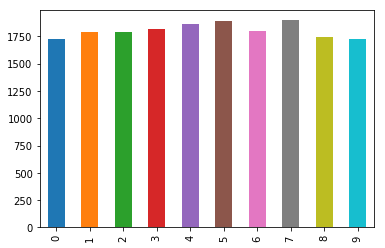

In [87]:
# visualization: final class distribution after removing duplicates and misclassified images
df_dataset_final["final"].plot(kind="bar")

In [91]:
# this is final dataset directory.. just verifying the count matching with above plot
data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_right_cure_final_noise/'
train_dir = os.path.join(data_dir, 'train')
for classname in class_list:
    print('{}: {} images'.format(classname, len(os.listdir(os.path.join(train_dir, classname)))))

c0: 1724 images
c1: 1794 images
c2: 1793 images
c3: 1822 images
c4: 1860 images
c5: 1887 images
c6: 1795 images
c7: 1897 images
c8: 1748 images
c9: 1726 images


### How to find duplicate images

***The score***  represents the structural similarity index between the two input images.
This value can fall into the range [-1, 1] with a value of one being a “perfect match.

***The diff image*** contains the actual image differences between the two input images that we wish to visualize. 
The difference image is currently represented as a floating point data type in the range [0, 1] 
so we first convert the array to 8-bit unsigned integers in the range [0, 255] (Line 26) before 
we can further process it using OpenCV.

In [101]:
from skimage.measure import compare_ssim
import imutils
import cv2

def read_img_cv2(filename):
    # load the two input images
    img = cv2.imread(filename)
 
    # convert the images to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    return gray

def compare_image_ssim(file1, file2):
    # load the two input images
    imageA = cv2.imread(file1)
    imageB = cv2.imread(file2)

    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    #print("SSIM: {}".format(score))
    return score, diff

def compare_image_data_ssim(grey_imgdataA, grey_imgdataB):
    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grey_imgdataA, grey_imgdataB, full=True)
    diff = (diff * 255).astype("uint8")
    #print("SSIM: {}".format(score))
    return score, diff

def plot_images(fimg1,fimg2):
    (score, diff) = compare_image_ssim(fimg1,fimg2)
    print("SSIM: {}".format(score))
    
    # load the two input images
    imageA = cv2.imread(fimg1)
    imageB = cv2.imread(fimg2)

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour and then draw the
        # bounding box on both input images to represent where the two
        # images differ
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # show the output images
    fig, axs = plt.subplots(2,2,figsize=(10,10))

    label = 'image1'
    axs[0][0].imshow(imageA)
    axs[0][0].set_title(label)

    label = 'image2'
    axs[0][1].imshow(imageB)
    axs[0][1].set_title(label)

    label = 'diff'
    axs[1][0].imshow(diff)
    axs[1][0].set_title(label)

    label = 'threshold'
    axs[1][1].imshow(thresh)
    axs[1][1].set_title(label)

    plt.show()

In [113]:
df_data[df_data["ssim_score"] > 0.95].head()

,SNo,subject,classname,img,duplicate,parent_img,ssim_score,duplicate_final
488,488,p002,c6,img_13137.jpg,1,img_50670.jpg,0.952920,1
4382,4382,p021,c0,img_18895.jpg,1,img_2528.jpg,0.950123,1
9270,9270,p035,c0,img_89362.jpg,1,img_66660.jpg,0.963028,1
9277,9277,p035,c0,img_59446.jpg,1,img_3509.jpg,0.956432,1
9281,9281,p035,c0,img_55476.jpg,1,img_3509.jpg,0.960208,1


In [103]:
# this is final dataset directory.. just verifying the count matching with above plot
data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_left/'
train_dir = os.path.join(data_dir, 'train')

In [121]:
# choose the image file name from above table which show duplicate images 
img1 = '{}/{}/{}'.format(train_dir, "c0", "img_2528.jpg")
img2 = '{}/{}/{}'.format(train_dir, "c0", "img_18895.jpg")

In [122]:
(score, diff) = compare_image_ssim(img1,img2)
print("SSIM: {}".format(score))

SSIM: 0.9501227805340965


SSIM: 0.9501227805340965


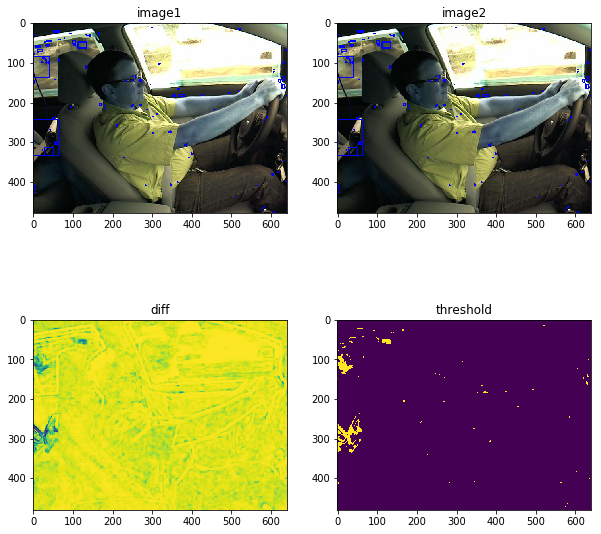

In [123]:
plot_images(img1,img2)

**basic image dirrefence using substract**

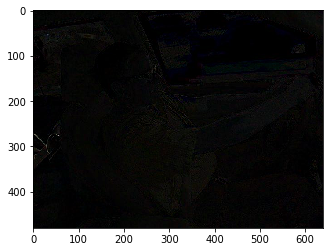

In [124]:
# load the two input images
imageA = cv2.imread(img1)
imageB = cv2.imread(img2)

difference = cv2.subtract(imageA, imageB)
b, g, r = cv2.split(difference)

if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("The images are completely Equal")

plt.imshow(difference)